In [1]:
import workload_simulation as ws
import forgetting_curve as fc
import matplotlib
import importlib

ModuleNotFoundError: No module named 'workload_simulation'

In [2]:
importlib.reload(workload_simulation)
import workload_simulation as ws

NameError: name 'importlib' is not defined

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
coeff = [1, 1, 1, 1, -30*12*4]
np.roots(coeff)

array([-5.98034326+0.j        , -0.24527878+5.77994744j,
       -0.24527878-5.77994744j,  5.47090083+0.j        ])

In [72]:
coeff = [1, 1, 1, 1, 1, -30*12*4]
np.roots(coeff)

array([-3.64423597+2.52930255j, -3.64423597-2.52930255j,
        1.12089941+4.10210697j,  1.12089941-4.10210697j,
        4.04667313+0.j        ])

In [73]:
coeff = [1, 1, 1, -30*12*4]
np.roots(coeff)

array([-5.97004951+9.79716154j, -5.97004951-9.79716154j,
       10.94009901+0.j        ])

In [76]:
coeff = [1, 1, -30*12*4]
np.roots(coeff)

array([-38.45062582,  37.45062582])

In [74]:
vals_to_print = []
total_output = []
# trick to get this kind of factor 1.0, 1.1, 1.2, 1.25, 1.3, 1.3333333333333333
# Why ? These factors produce sensible enough different simulations because intervals are integers 
# Intervals get rounded if they become float, so for the sake of the simulation, let's pick factors that
# would result in neat intervals

# How ? : take floats that would be close to integers when multiplied by common integers
list_of_factors = [i / 120 for i in range(3 * 60, 10 * 300) if (i % 30 == 0) or (i % 40 == 0) or (i % 12 == 0)]
focus_output = []
focus_output_too_high = []
focus_output_too_low = []
for factor in list_of_factors:
    pbt = fc.get_pb_success_from_interval_modifier(factor / 2.5)
    l = ws.sim(pbt, nsims=1000, onfail="reset", ndays=1,
            difficulty=0.93, factor=factor)
    quotient = l[0] / l[1]
    row = ws.SimulationResult(pbt, l[0], l[1], quotient, factor)
    total_output.append(row)

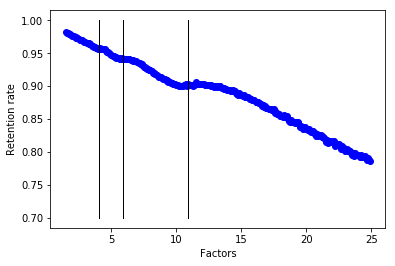

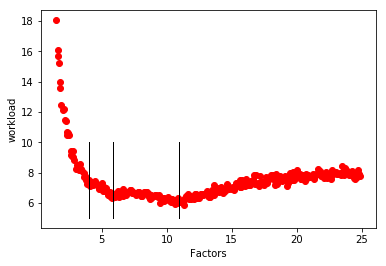

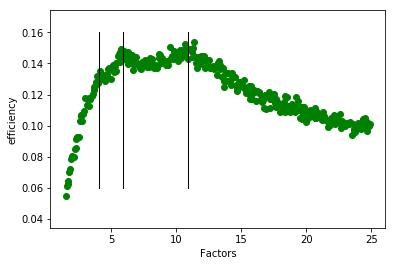

In [75]:
factors = [output.factor for output in total_output]
r_rates = [output.r_rate for output in total_output]
w_loads = [output.w_load for output in total_output]
effs = [output.efficiency for output in total_output]

plt.scatter(factors, r_rates,  color='blue')
plt.xlabel("Factors")
plt.ylabel("Retention rate")
plt.plot([10.94, 10.94], [0.7, 1], 'k-', lw=1)
plt.plot([5.88, 5.88], [0.7, 1], 'k-', lw=1)
plt.plot([4.04, 4.04], [0.7, 1], 'k-', lw=1)
plt.show()
plt.scatter(factors, w_loads,  color='red')
plt.xlabel("Factors")
plt.ylabel("workload")
plt.plot([10.94, 10.94], [5, 10], 'k-', lw=1)
plt.plot([5.88, 5.88], [5, 10], 'k-', lw=1)
plt.plot([4.04, 4.04], [5, 10], 'k-', lw=1)
plt.show()
plt.scatter(factors, effs,  color='green')
plt.plot([10.94, 10.94], [0.06, 0.16], 'k-', lw=1)
plt.plot([5.88, 5.88], [0.06, 0.16], 'k-', lw=1)
plt.plot([4.04, 4.04], [0.06, 0.16], 'k-', lw=1)
plt.xlabel("Factors")
plt.ylabel("efficiency")
plt.show()